# KMeans 첫 예제로 3개 군집
## 단계별 KMeans 이해하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

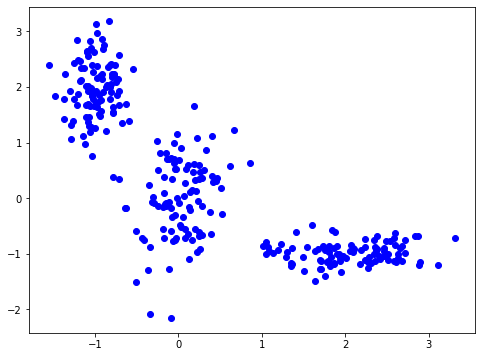

In [2]:
# Let's begin by allocation 3 cluster's points
X = np.zeros((300, 2))

np.random.seed(seed=99)
X[:100, 0] = np.random.normal(loc=0.0, scale=.3, size=100)
X[:100, 1] = np.random.normal(loc=0.0, scale=.7, size=100)

X[100:200, 0] = np.random.normal(loc=2.0, scale=.5, size=100)
X[100:200, 1] = np.random.normal(loc=-1.0, scale=.2, size=100)

X[200:300, 0] = np.random.normal(loc=-1.0, scale=.2, size=100)
X[200:300, 1] = np.random.normal(loc=2.0, scale=.5, size=100)

plt.figure(figsize=(8, 6))
plt.plot(X[:, 0], X[:, 1], 'bo');

In [3]:
# Scipy has function that takes 2 tuples and return
# calculated distance between them
from scipy.spatial.distance import cdist

# Randomly allocate the 3 centroids 
np.random.seed(seed=99)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

In [4]:
for i in range(3):
    # 클러스터 중심에서 각각의 점들의 거리를 계산
    distances = cdist(X, centroids)
    # 가장 가까운 중심점 확인 
    labels = distances.argmin(axis=1)
    
    # 거리에 따라서 라베링하기 
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)

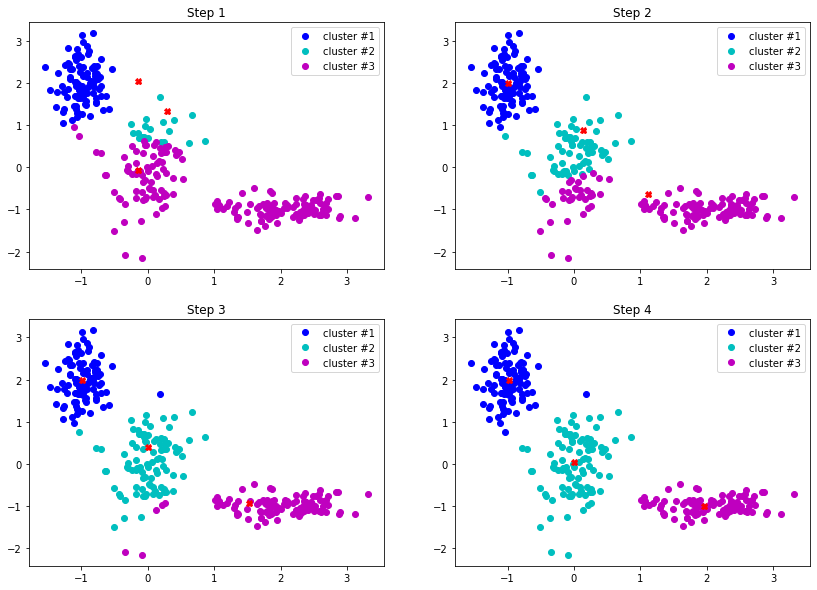

In [5]:
# K-means 진행과정을 그림 그리기 
plt.figure(figsize=(14, 10))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

In [6]:
from sklearn.cluster import KMeans

In [7]:
error = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    error.append(np.sqrt(kmeans.inertia_))
    # 중간과정을 확인하고 싶으로 아래의 주석을 제거 
    #print(k,np.square(kmeans.inertia_))

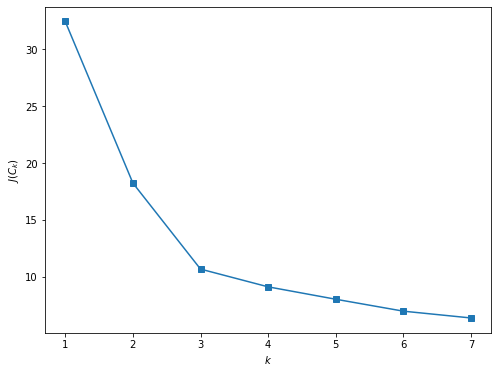

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), error, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');